In [ ]:
import os
import shutil
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from efficientnet_pytorch import EfficientNet
import matplotlib.pyplot as plt



In [ ]:
!pip install efficientnet-pytorch


  Using cached efficientnet_pytorch-0.7.1-py3-none-any.whl



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/168.5 kB ? eta -:--:--
     ---- -------------------------------- 20.5/168.5 kB 330.3 kB/s eta 0:00:01
     ------ ------------------------------ 30.7/168.5 kB 330.3 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/168.5 kB 585.1 kB/s eta 0:00:01
     ------------------------------ ----- 143.4/168.5 kB 711.9 kB/s eta 0:00:01
     ------------------------------------ 168.5/168.5 kB 726.0 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
    --------------------------------------- 0.1/8.0 MB 2.0 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.0 MB 1.8 MB/s eta 0:00:05
   - ---------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Using device: cpu


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\User/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth
100.0%


Loaded pretrained weights for efficientnet-b0
Epoch 1/10
Train Loss: 0.2412, Train Accuracy: 0.9024
Test Loss: 2.1088, Test Accuracy: 0.6939
Epoch 2/10
Train Loss: 0.1717, Train Accuracy: 0.9311
Test Loss: 0.8461, Test Accuracy: 0.7159
Epoch 3/10
Train Loss: 0.1446, Train Accuracy: 0.9345
Test Loss: 0.9789, Test Accuracy: 0.7293
Epoch 4/10
Train Loss: 0.1414, Train Accuracy: 0.9418
Test Loss: 0.7124, Test Accuracy: 0.8012
Epoch 5/10
Train Loss: 0.1176, Train Accuracy: 0.9534
Test Loss: 0.4604, Test Accuracy: 0.8573
Epoch 6/10
Train Loss: 0.0947, Train Accuracy: 0.9613
Test Loss: 0.2404, Test Accuracy: 0.9134
Epoch 7/10
Train Loss: 0.0792, Train Accuracy: 0.9707
Test Loss: 0.1699, Test Accuracy: 0.9280
Epoch 8/10
Train Loss: 0.0712, Train Accuracy: 0.9753
Test Loss: 0.2963, Test Accuracy: 0.9159
Epoch 9/10
Train Loss: 0.0549, Train Accuracy: 0.9808
Test Loss: 0.2501, Test Accuracy: 0.9207
Epoch 10/10
Train Loss: 0.0310, Train Accuracy: 0.9884
Test Loss: 0.2443, Test Accuracy: 0.9341


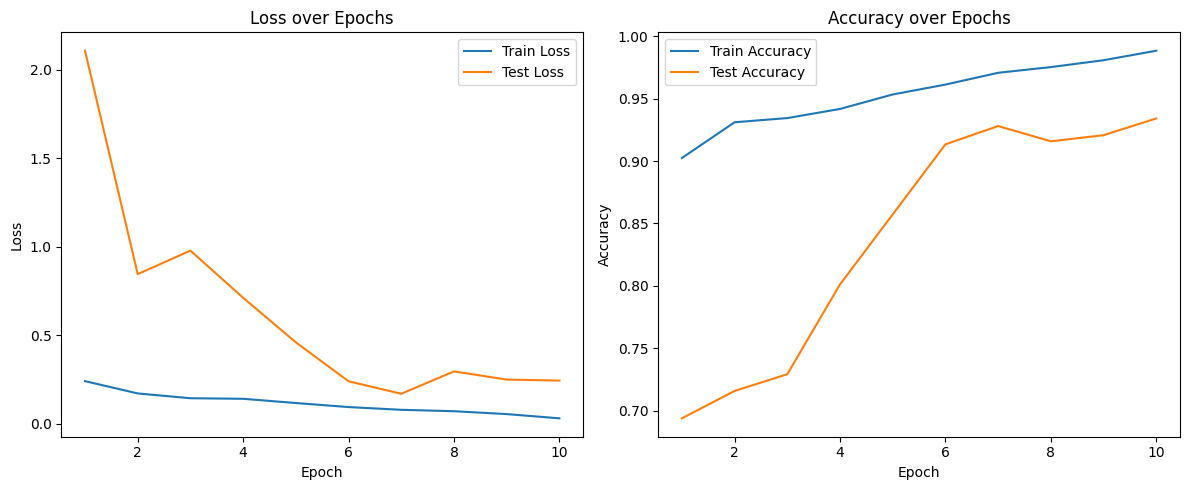

Model saved as binary_classifier.pth


In [ ]:
import torch  # импортируем pytorch
import torch.nn as nn  # импортируем нейросетевые модули
import torch.optim as optim  # импортируем оптимизаторы
from torch.utils.data import DataLoader, random_split  # импортируем модули для работы с данными
from torchvision import datasets, transforms  # импортируем датасеты и преобразования изображений
from efficientnet_pytorch import EfficientNet  # импортируем модель EfficientNet
import matplotlib.pyplot as plt  # импортируем matplotlib для построения графиков
import seaborn as sns  # импортируем seaborn для улучшенной визуализации

# Проверка устройства (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # выбираем устройство
print(f"Using device: {device}")  # выводим используемое устройство

# Пути к данным
data_dir = "C:/Users/User/Desktop/IBCH/ibch/good_bad_model/data"  # путь к данным

# Преобразования для изображений
transform = transforms.Compose([  # последовательность преобразований
  transforms.Resize((224, 224)),  # изменение размера изображений до 224x224 для EfficientNet
  transforms.ToTensor(),  # преобразование в тензор
  transforms.Normalize(mean=[0.5], std=[0.5])  # нормализация изображений в диапазоне [-1, 1]
])

# Загрузка датасета
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)  # загрузка изображений из папки

# Разделение на обучающий и тестовый наборы
train_size = int(0.8 * len(full_dataset))  # 80% для обучения
test_size = len(full_dataset) - train_size  # 20% для тестирования
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])  # разделение

# Загрузчики данных
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # загрузчик для обучения
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # загрузчик для тестирования

# Загрузка модели EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')  # загружаем предобученную модель EfficientNet
num_features = model._fc.in_features  # количество признаков во входном слое
model._fc = nn.Linear(num_features, 1)  # изменяем выходной слой для бинарной классификации
model = model.to(device)  # отправляем модель на выбранное устройство (GPU или CPU)

# Определение функции потерь и оптимизатора
criterion = nn.BCEWithLogitsLoss()  # используем функцию потерь для бинарной классификации
optimizer = optim.Adam(model.parameters(), lr=0.001)  # оптимизатор Adam с заданной скоростью обучения
                                                      # Первый момент (m) — это экспоненциально усредненный градиент, который можно рассматривать как разновидность momentum.
                                                      # Второй момент (v) — это экспоненциально усредненная величина квадратов градиентов, которая нормализует скорость обновления для каждого параметра.

# Функция обучения модели
def train(model, loader, criterion, optimizer):
  model.train()  # переключаем модель в режим обучения
  total_loss = 0  # переменная для хранения общей потери
  correct = 0  # переменная для подсчета правильных классификаций
  for images, labels in loader:  # перебираем пакеты данных
    images, labels = images.to(device), labels.to(device).float().unsqueeze(1)  # перемещаем данные на устройство и изменяем форму меток для BCE
    optimizer.zero_grad()  # обнуляем градиенты
    outputs = model(images)  # получаем предсказания модели
    loss = criterion(outputs, labels)  # вычисляем потерю
    loss.backward()  # вычисляем градиенты
    optimizer.step()  # обновляем параметры модели
    total_loss += loss.item()  # добавляем потерю в общую сумму
    predictions = (torch.sigmoid(outputs) > 0.5).float()  # преобразуем логиты в вероятности и делаем предсказание
    correct += (predictions == labels).sum().item()  # подсчитываем количество правильных предсказаний
  accuracy = correct / len(loader.dataset)  # вычисляем точность
  return total_loss / len(loader), accuracy  # возвращаем среднюю потерю и точность

# Функция тестирования модели
def test(model, loader, criterion):
  model.eval()  # переключаем модель в режим тестирования
  total_loss = 0  # переменная для хранения общей потери
  correct = 0  # переменная для подсчета правильных классификаций
  with torch.no_grad():  # выключаем градиенты для тестирования
    for images, labels in loader:  # перебираем пакеты данных
      images, labels = images.to(device), labels.to(device).float().unsqueeze(1)  # перемещаем данные на устройство
      outputs = model(images)  # получаем предсказания модели
      loss = criterion(outputs, labels)  # вычисляем потерю
      total_loss += loss.item()  # добавляем потерю в общую сумму
      predictions = (torch.sigmoid(outputs) > 0.5).float()  # преобразуем логиты в вероятности и делаем предсказание
      correct += (predictions == labels).sum().item()  # подсчитываем количество правильных предсказаний
  accuracy = correct / len(loader.dataset)  # вычисляем точность
  return total_loss / len(loader), accuracy  # возвращаем среднюю потерю и точность

# Функция для построения графиков
def plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies):
  epochs = range(1, len(train_losses) + 1)  # создаем диапазон для оси x
  plt.figure(figsize=(12, 5))  # задаем размер фигуры

  # График потерь
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_losses, label='Train Loss')  # строим график потерь на обучении
  plt.plot(epochs, test_losses, label='Test Loss')  # строим график потерь на тестировании
  plt.xlabel('Epoch')  # подпись оси X
  plt.ylabel('Loss')  # подпись оси Y
  plt.title('Loss over Epochs')  # заголовок графика
  plt.legend()  # добавляем легенду

  # График точности
  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_accuracies, label='Train Accuracy')  # строим график точности на обучении
  plt.plot(epochs, test_accuracies, label='Test Accuracy')  # строим график точности на тестировании
  plt.xlabel('Epoch')  # подпись оси X
  plt.ylabel('Accuracy')  # подпись оси Y
  plt.title('Accuracy over Epochs')  # заголовок графика
  plt.legend()  # добавляем легенду

  plt.tight_layout()  # корректируем расположение графиков
  plt.show()  # отображаем графики

# Основной цикл обучения
epochs = 10  # количество эпох
train_losses, test_losses = [], []  # списки для потерь
train_accuracies, test_accuracies = [], []  # списки для точности
for epoch in range(epochs):  # для каждой эпохи
  train_loss, train_acc = train(model, train_loader, criterion, optimizer)  # обучение
  test_loss, test_acc = test(model, test_loader, criterion)  # тестирование
  train_losses.append(train_loss)  # добавляем потери на обучении в список
  test_losses.append(test_loss)  # добавляем потери на тестировании в список
  train_accuracies.append(train_acc)  # добавляем точность на обучении в список
  test_accuracies.append(test_acc)  # добавляем точность на тестировании в список
  print(f"Epoch {epoch+1}/{epochs}")  # выводим номер эпохи
  print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")  # выводим результаты для обучения
  print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")  # выводим результаты для тестирования

# Построение графиков
plot_metrics(train_losses, test_losses, train_accuracies, test_accuracies)  # вызываем функцию для построения графиков

# Save the model
# torch.save(model.state_dict(), "binary_classifier.pth")
# print("Model saved as binary_classifier.pth")



In [ ]:
torch.save(model.state_dict(), "C:/Users/User/Desktop/IBCH/ibch/good_bad_model/binary_classifier2.pth")
print("Model saved as binary_classifier.pth")

Model saved as binary_classifier.pth


In [ ]:
from efficientnet_pytorch import EfficientNet
import torch
import torch.nn as nn
from PIL import Image
import os
from torchvision import transforms
import shutil

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
  transforms.Resize((224, 224)),  # Resize images to 224x224 for EfficientNet
  transforms.ToTensor(),  # Convert to tensor
  transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1, 1]
])

def classify_images(model_path, image_dir, output_good_dir, output_bad_dir):
  # Load the model
  model = EfficientNet.from_pretrained('efficientnet-b0')
  num_features = model._fc.in_features
  model._fc = nn.Linear(num_features, 1)
  weights = torch.load(model_path, map_location=device)  # Load weights only
  model.load_state_dict(weights, strict=True)  # Apply weights to model
  model = model.to(device)
  model.eval()

  # Process each image in the directory
  for root, _, files in os.walk(image_dir):
    for file in files:
      image_path = os.path.join(root, file)
      if not file.lower().endswith('.tif'):
        continue  # Skip non-TIF files
      try:
        # Load and preprocess the image
        image = Image.open(image_path).convert("RGB")  # Open and convert to RGB
        transformed_image = transform(image).unsqueeze(0).to(device)  # Apply transformations and add batch dimension

        # Predict
        with torch.no_grad():
          output = model(transformed_image)
          prediction = torch.sigmoid(output).item()

        # Classify and move to appropriate folder
        if prediction > 0.5:
          shutil.copy(image_path, os.path.join(output_good_dir, file))
        else:
          shutil.copy(image_path, os.path.join(output_bad_dir, file))

      except Exception as e:
        print(f"Error processing {image_path}: {e}")

classify_images("C:/Users/User/Desktop/IBCH/ibch/good_bad_model/binary_classifier2.pth", "C:/Users/User/Desktop/IBCH/ibch/good_bad_model/test_test", "C:/Users/User/Desktop/IBCH/ibch/good_bad_model/test_test_good", "C:/Users/User/Desktop/IBCH/ibch/good_bad_model/test_test_bad")

Loaded pretrained weights for efficientnet-b0


C:\Users\User\AppData\Local\Temp\ipykernel_27756\1535919154.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(model_path, map_location=device)  # Loa

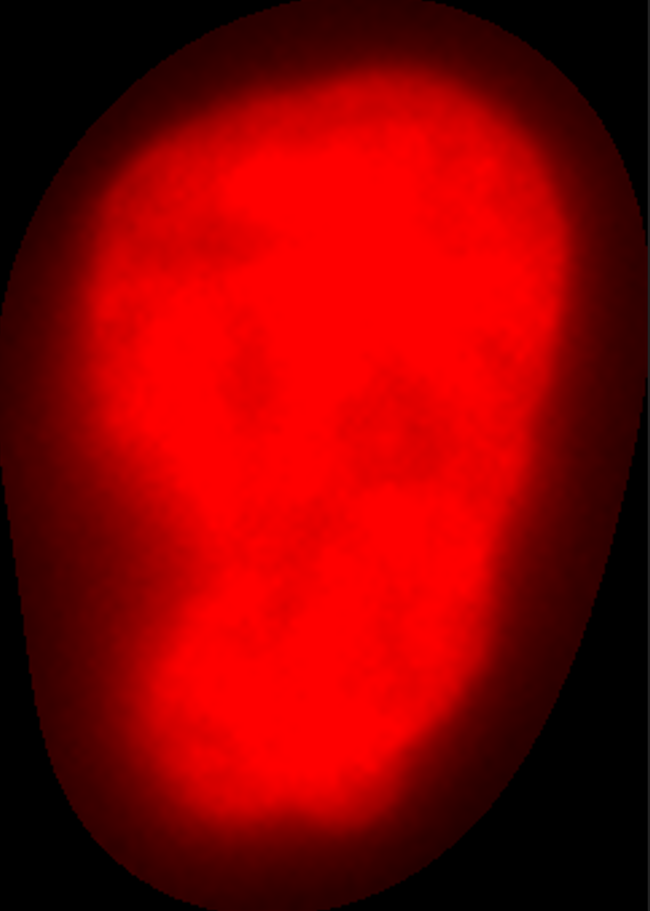

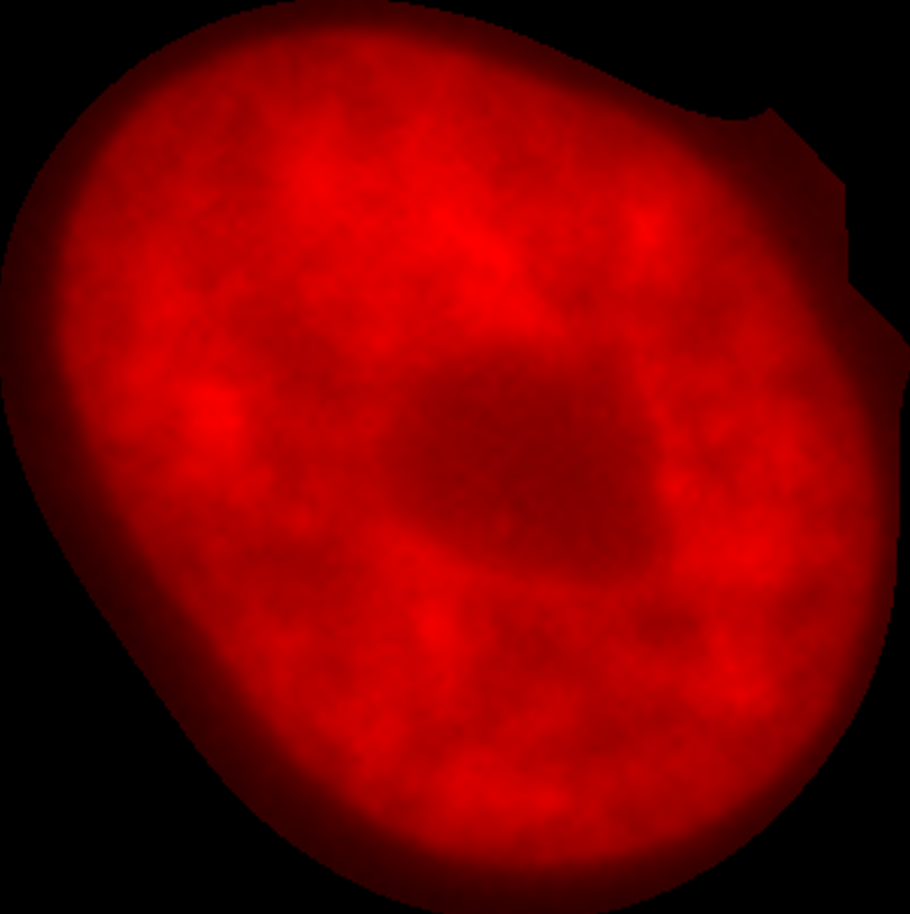

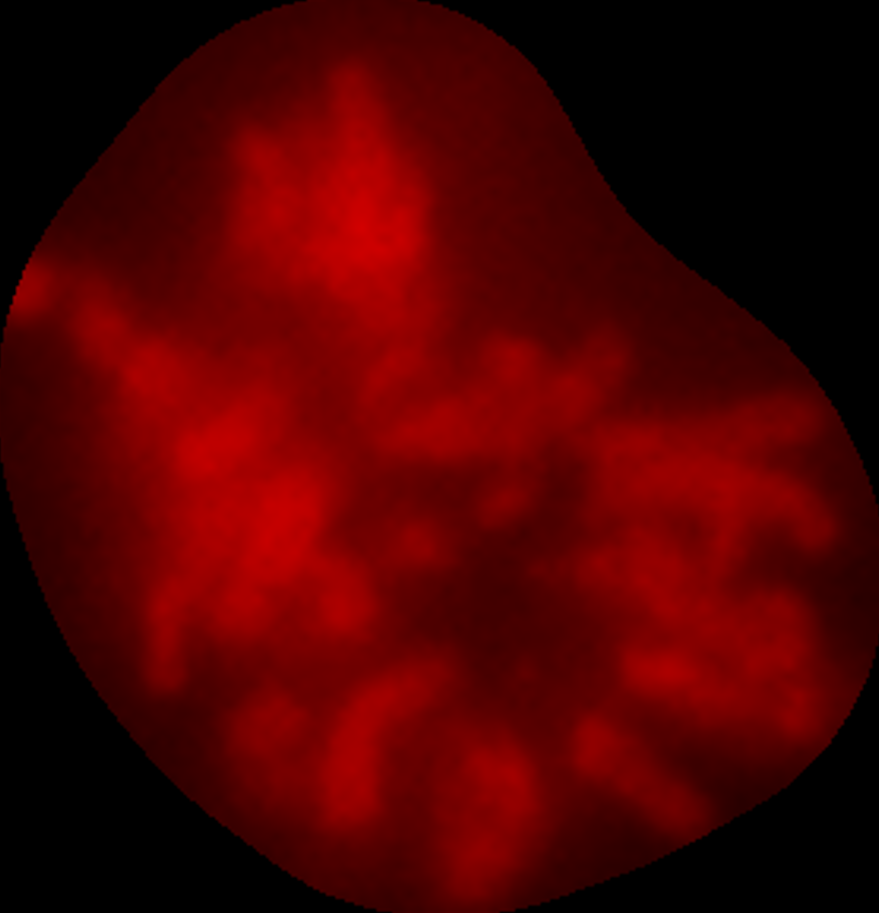